In [1]:
getwd()

[1] "C:/Users/HPPC"

In [37]:
ipl = read.csv('IPL Matches 2008-2020.csv')

In [3]:
head(ipl)

id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,NA,Asad Rauf,RE Koertzen
335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,NA,MR Benson,SL Shastri
335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,N,NA,Aleem Dar,GA Pratapkumar
335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,NA,SJ Davis,DJ Harper
335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,NA,BF Bowden,K Hariharan
335987,Jaipur,21-04-2008,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6,N,NA,Aleem Dar,RB Tiffin


In [4]:

summary(ipl)

       id                 city             date           player_of_match
 Min.   : 335982   Mumbai   :101   01-05-2008:  2   AB de Villiers: 23   
 1st Qu.: 501228   Kolkata  : 77   01-05-2009:  2   CH Gayle      : 22   
 Median : 729298   Delhi    : 74   01-05-2011:  2   RG Sharma     : 18   
 Mean   : 756350   Bangalore: 65   01-05-2012:  2   DA Warner     : 17   
 3rd Qu.:1082626   Hyderabad: 64   01-05-2013:  2   MS Dhoni      : 17   
 Max.   :1237181   (Other)  :422   01-05-2015:  2   (Other)       :715   
                   NA's     : 13   (Other)   :804   NA's          :  4   
                                       venue     neutral_venue    
 M Chinnaswamy Stadium                    : 80   Min.   :0.00000  
 Eden Gardens                             : 77   1st Qu.:0.00000  
 Feroz Shah Kotla                         : 74   Median :0.00000  
 Wankhede Stadium                         : 73   Mean   :0.09436  
 Rajiv Gandhi International Stadium, Uppal: 64   3rd Qu.:0.00000  
 MA Ch

### Getting the Prerequisite Libraries

In [5]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Most Number of Player of the Match Awards

In [6]:
most.mom = ipl %>% group_by(player_of_match) %>% 
  summarise(Awards = n()) %>% arrange(desc(Awards))

most.mom = most.mom[1:10, ]

most.mom

options(warn = -1)

Warning message:
"Factor `player_of_match` contains implicit NA, consider using `forcats::fct_explicit_na`"

player_of_match,Awards
AB de Villiers,23
CH Gayle,22
RG Sharma,18
DA Warner,17
MS Dhoni,17
SR Watson,16
YK Pathan,16
SK Raina,14
G Gambhir,13
V Kohli,13


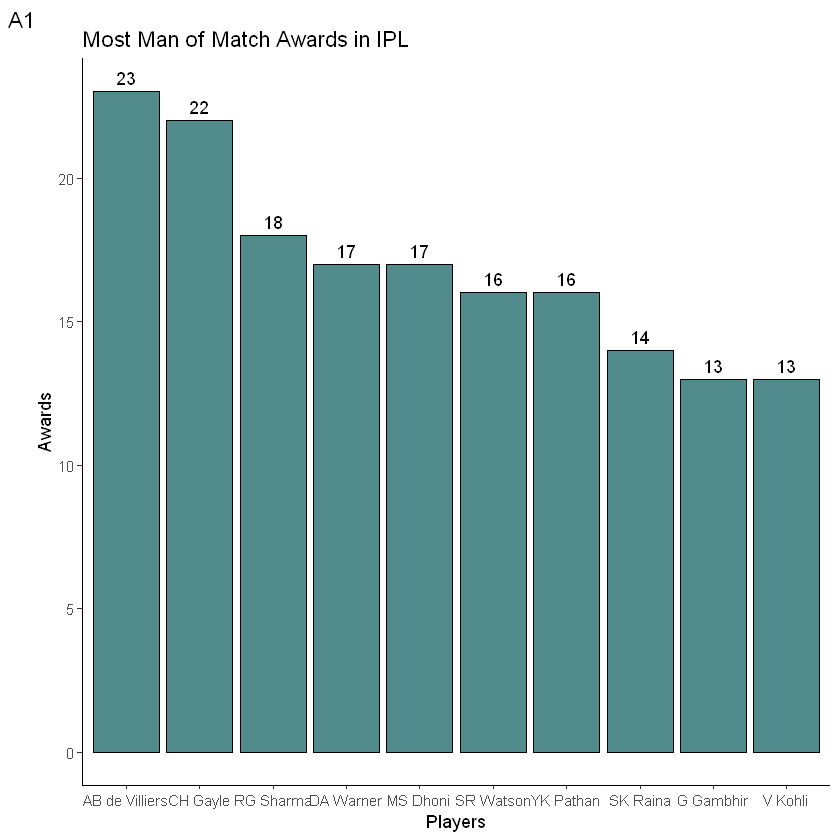

In [7]:
ggplot(most.mom, aes(reorder(player_of_match, -Awards), Awards))+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  geom_text(aes(label = Awards, vjust = -0.5))+ theme_classic() +
  labs(title = 'Most Man of Match Awards in IPL', x = 'Players',
      tag = 'A1') + theme(legend.position = 'none')

## MOST NO. OF MATCHES WON & PLAYED 

In [8]:
table(ipl$team1)


        Chennai Super Kings             Deccan Chargers 
                         94                          39 
             Delhi Capitals            Delhi Daredevils 
                         19                          83 
              Gujarat Lions             Kings XI Punjab 
                         16                          92 
       Kochi Tuskers Kerala       Kolkata Knight Riders 
                          7                          95 
             Mumbai Indians               Pune Warriors 
                         97                          23 
           Rajasthan Royals      Rising Pune Supergiant 
                         70                           7 
    Rising Pune Supergiants Royal Challengers Bangalore 
                          7                         108 
        Sunrisers Hyderabad 
                         59 

### Due to change of ownership Deccan Chargers was renamed to Sunrisers Hyderabad but I am not considering those two as separate teams since both DC and SRH had same players in 2012 and 2013 only the name and jersey in changed. 
### Same case with Delhi Capitals and Delhi Daredevils

In [9]:
ipl[ipl == 'Deccan Chargers'] = 'Sunrisers Hyderabad'

ipl[ipl == 'Delhi Daredevils'] = 'Delhi Capitals'

ipl[ipl == 'Rising Pune Supergiant'] = 'Rising Pune Supergiants'

In [10]:
table(ipl$team1)


        Chennai Super Kings             Deccan Chargers 
                         94                           0 
             Delhi Capitals            Delhi Daredevils 
                        102                           0 
              Gujarat Lions             Kings XI Punjab 
                         16                          92 
       Kochi Tuskers Kerala       Kolkata Knight Riders 
                          7                          95 
             Mumbai Indians               Pune Warriors 
                         97                          23 
           Rajasthan Royals      Rising Pune Supergiant 
                         70                           0 
    Rising Pune Supergiants Royal Challengers Bangalore 
                         14                         108 
        Sunrisers Hyderabad 
                         98 

## most matches won

In [12]:
wins.most = ipl %>% group_by(winner) %>% 
  summarise(Wins = n()) %>% arrange(desc(Wins))

wins.most = wins.most[1:8,  ]  

wins.most


winner,Wins
Mumbai Indians,120
Chennai Super Kings,106
Kolkata Knight Riders,99
Sunrisers Hyderabad,95
Royal Challengers Bangalore,91
Kings XI Punjab,88
Delhi Capitals,86
Rajasthan Royals,81


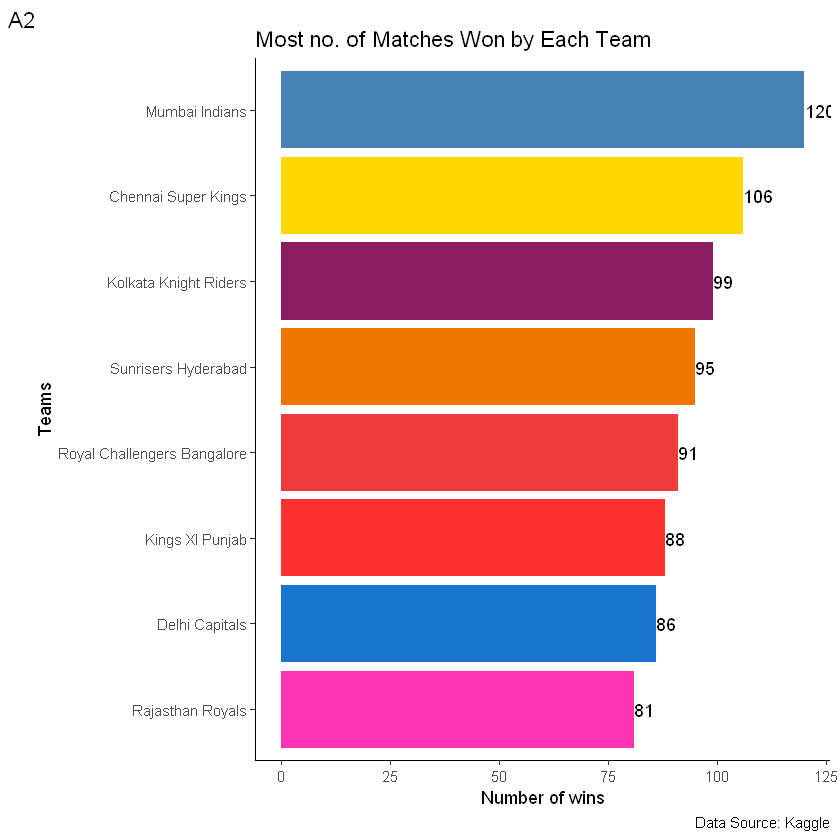

In [14]:
ggplot(wins.most, aes(reorder(winner, Wins),Wins, fill = winner ))+ theme_classic()+
  geom_bar(stat = 'identity') + geom_text(aes(label = Wins, hjust = -0.01))+
  labs(title = 'Most no. of Matches Won by Each Team', x = 'Teams',
       y = 'Number of wins', caption = 'Data Source: Kaggle', tag = 'A2')+
  theme(legend.position = 'none')+ coord_flip() +
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                   'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                    'Delhi Capitals' = 'dodgerblue3', 'Rajasthan Royals' = 'maroon1'))

## most matches played

In [15]:
most.matches1 =  ipl %>% group_by(team1) %>% 
  summarise(Matches.played1 = n())

most.matches1

team1,Matches.played1
Chennai Super Kings,94
Delhi Capitals,102
Gujarat Lions,16
Kings XI Punjab,92
Kochi Tuskers Kerala,7
Kolkata Knight Riders,95
Mumbai Indians,97
Pune Warriors,23
Rajasthan Royals,70
Rising Pune Supergiants,14


In [16]:
most.matches2 = ipl %>% group_by(team2) %>% 
  summarise(Matches.played2 = n())

most.matches2

team2,Matches.played2
Chennai Super Kings,84
Delhi Capitals,92
Gujarat Lions,14
Kings XI Punjab,98
Kochi Tuskers Kerala,7
Kolkata Knight Riders,97
Mumbai Indians,106
Pune Warriors,23
Rajasthan Royals,91
Rising Pune Supergiants,16


### Binding both the dataframes as one: 

In [17]:
most.matches = cbind(most.matches1, most.matches2)

most.matches = most.matches %>% mutate(Matches.played = Matches.played1 + 
                                         Matches.played2) %>% 
  select(team1, Matches.played) %>% arrange(desc(Matches.played))

most.matches

team1,Matches.played
Mumbai Indians,203
Sunrisers Hyderabad,199
Royal Challengers Bangalore,195
Delhi Capitals,194
Kolkata Knight Riders,192
Kings XI Punjab,190
Chennai Super Kings,178
Rajasthan Royals,161
Pune Warriors,46
Gujarat Lions,30


### Removing Kochi, Gujarat and two Pune teams: 

In [18]:
most.matches = most.matches[1:8, ]

most.matches


team1,Matches.played
Mumbai Indians,203
Sunrisers Hyderabad,199
Royal Challengers Bangalore,195
Delhi Capitals,194
Kolkata Knight Riders,192
Kings XI Punjab,190
Chennai Super Kings,178
Rajasthan Royals,161


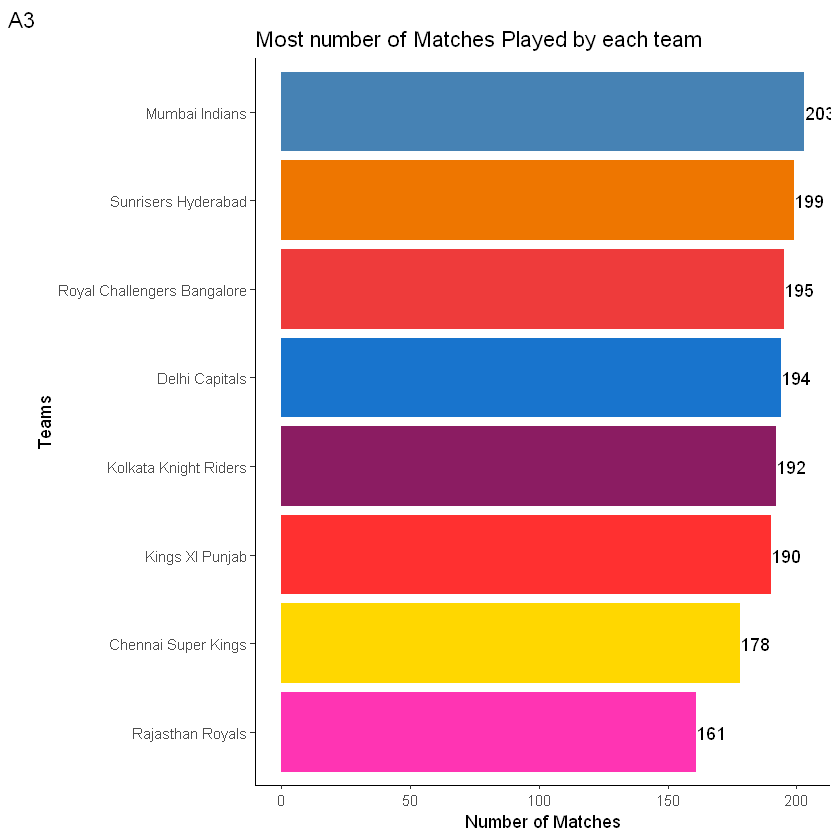

In [20]:
ggplot(most.matches, aes(reorder(team1,Matches.played), Matches.played,
                         fill = team1))+ coord_flip()+
  theme_classic()+ geom_bar(stat = 'identity') + 
  geom_text( aes(label = Matches.played, hjust = -0.01))+
  labs(y = 'Number of Matches', tag = 'A3', x = 'Teams',
       title ='Most number of Matches Played by each team') + 
  theme(legend.position = 'none')+
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                               'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
                               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                               'Delhi Capitals' = 'dodgerblue3', 'Rajasthan Royals' = 'maroon1'))

### WIN TO MATCH RATIO:

In [21]:
wins.most = arrange(wins.most, winner)

most.matches = arrange(most.matches, team1)

win.match.ratio = cbind(wins.most, most.matches)

win.match.ratio = win.match.ratio %>% group_by(team1) %>% 
  mutate(Win.per.Match.ratio = round(Wins/Matches.played * 100, digits = 2)) %>% 
  select(team1,Matches.played, Wins, Win.per.Match.ratio)

win.match.ratio$Win.per.Match.ratio = paste0(win.match.ratio$Win.per.Match.ratio, '%')

win.match.ratio




team1,Matches.played,Wins,Win.per.Match.ratio
Chennai Super Kings,178,106,59.55%
Delhi Capitals,194,86,44.33%
Kings XI Punjab,190,88,46.32%
Kolkata Knight Riders,192,99,51.56%
Mumbai Indians,203,120,59.11%
Rajasthan Royals,161,81,50.31%
Royal Challengers Bangalore,195,91,46.67%
Sunrisers Hyderabad,199,95,47.74%


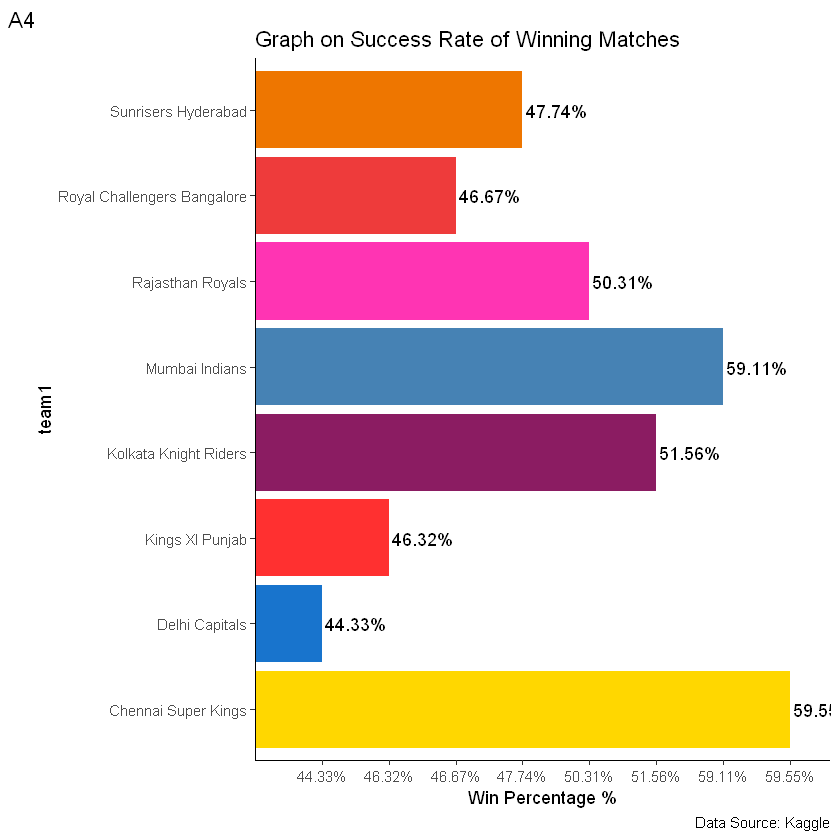

In [22]:
ggplot(win.match.ratio, aes(team1, Win.per.Match.ratio, fill = team1))+
  geom_bar(stat = 'identity')+ theme_classic()+ 
  geom_text(aes(label=Win.per.Match.ratio, hjust = -0.05))+
  labs(title = 'Graph on Success Rate of Winning Matches', y = 'Win Percentage %',
       caption = 'Data Source: Kaggle', tag = 'A4') + 
  theme(legend.position = 'none')+ coord_flip()+
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                               'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
                               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                               'Delhi Capitals' = 'dodgerblue3', 'Rajasthan Royals' = 'maroon1'))

## TOSS/MATCH WIN RATIO



### Most toss winners: 

In [23]:
toss.win = ipl %>% group_by(toss_winner) %>% 
  summarise(No.of.times = n()) %>% arrange(toss_winner)


toss.win = toss.win[ -c(3,5,8,10), ]

toss.win

toss_winner,No.of.times
Chennai Super Kings,97
Delhi Capitals,100
Kings XI Punjab,85
Kolkata Knight Riders,98
Mumbai Indians,106
Rajasthan Royals,87
Royal Challengers Bangalore,87
Sunrisers Hyderabad,100


In [24]:
toss.match.win.ratio = cbind(toss.win, most.matches)

toss.match.win.ratio = toss.match.win.ratio %>% group_by(team1) %>% 
  mutate(Ratio = round((No.of.times/Matches.played) *100 , 2)) %>% 
  select(team1, Matches.played, No.of.times, Ratio)

toss.match.win.ratio$Ratio = paste0(toss.match.win.ratio$Ratio, '%')

toss.match.win.ratio

team1,Matches.played,No.of.times,Ratio
Chennai Super Kings,178,97,54.49%
Delhi Capitals,194,100,51.55%
Kings XI Punjab,190,85,44.74%
Kolkata Knight Riders,192,98,51.04%
Mumbai Indians,203,106,52.22%
Rajasthan Royals,161,87,54.04%
Royal Challengers Bangalore,195,87,44.62%
Sunrisers Hyderabad,199,100,50.25%


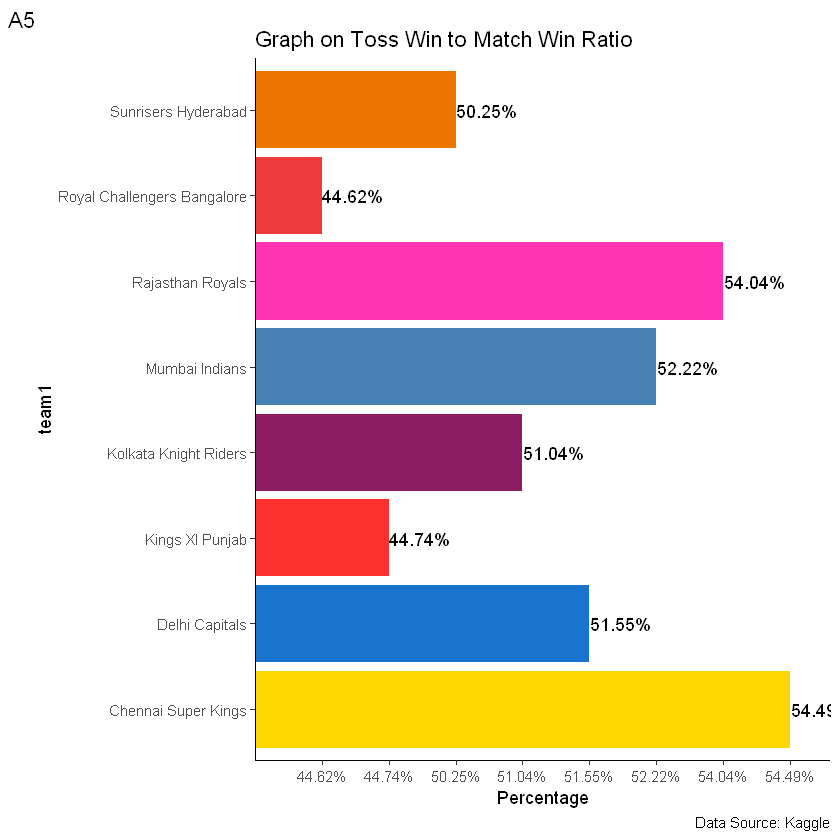

In [25]:
ggplot(toss.match.win.ratio, aes(team1, Ratio, fill = team1)) + theme_classic()+
  geom_bar(stat = 'identity') + geom_text(aes(label = Ratio, hjust = -0.01))+
  theme(legend.position = 'none')+
  labs(title = 'Graph on Toss Win to Match Win Ratio', y = 'Percentage',
       caption = 'Data Source: Kaggle', tag = 'A5') + coord_flip()+
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                               'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
                               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                               'Delhi Capitals' = 'dodgerblue3', 'Rajasthan Royals' = 'maroon1'))

## Most Wins After Batting First

In [26]:
bat.first.wins = ipl %>% group_by(winner) %>% 
  filter(result == 'runs') %>% 
  summarise(Wins = n())

bat.first.wins = bat.first.wins[-c(3,5,8,10), ]

bat.first.wins

winner,Wins
Chennai Super Kings,53
Delhi Capitals,34
Kings XI Punjab,40
Kolkata Knight Riders,41
Mumbai Indians,62
Rajasthan Royals,28
Royal Challengers Bangalore,38
Sunrisers Hyderabad,52


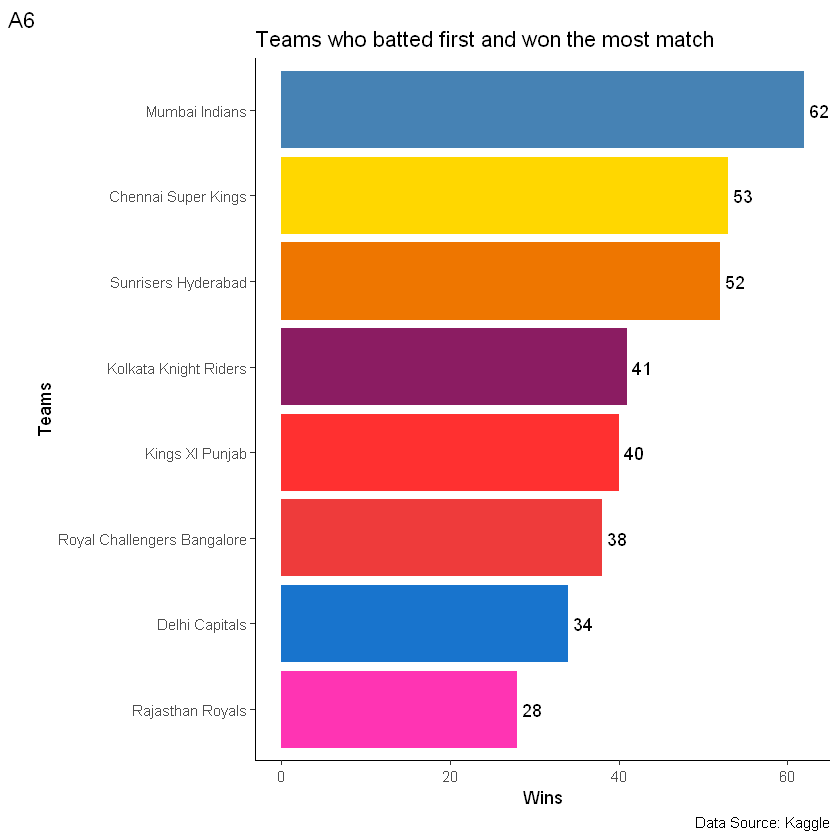

In [28]:
ggplot(bat.first.wins, aes( reorder(winner, Wins), Wins, fill = winner)) +
  theme_classic()+
  geom_bar(stat = 'identity')+ geom_text(aes(label = Wins, hjust = -0.25))+
  labs(title = 'Teams who batted first and won the most match',x = 'Teams', y = 'Wins',
       caption = 'Data Source: Kaggle', tag = 'A6') + coord_flip()+
  theme(legend.position = 'none')+
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                               'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
                               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                               'Delhi Capitals' = 'dodgerblue3', 'Rajasthan Royals' = 'maroon1'))


## Most Wins Chasing the Target

In [29]:
bat.second.wins = ipl %>% group_by(winner) %>% 
  filter(result == 'wickets') %>% 
  summarise(Wins = n())

bat.second.wins = bat.second.wins[ -c(3,5,8,10), ]

bat.second.wins

winner,Wins
Chennai Super Kings,53
Delhi Capitals,50
Kings XI Punjab,45
Kolkata Knight Riders,57
Mumbai Indians,56
Rajasthan Royals,51
Royal Challengers Bangalore,51
Sunrisers Hyderabad,42


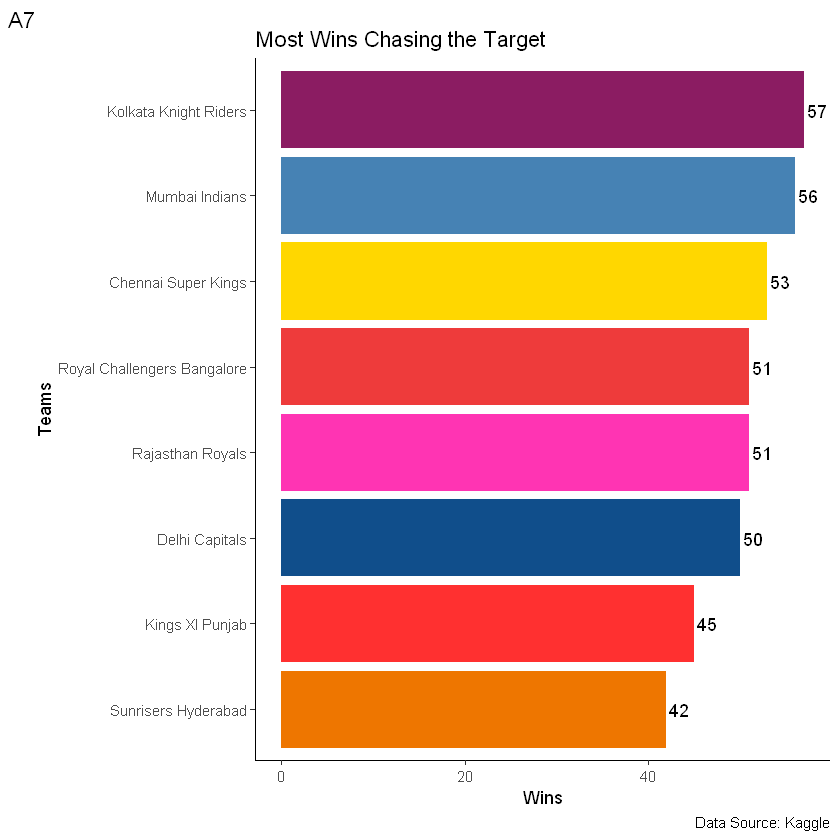

In [30]:
ggplot(bat.second.wins, aes(reorder(winner, Wins), Wins, fill = winner)) + 
  theme_classic()+ theme(legend.position = 'none')+
  geom_bar(stat = 'identity')+ geom_text(aes(label = Wins, hjust = -0.15))+
  labs(title = 'Most Wins Chasing the Target', x = 'Teams', y = 'Wins',
       caption = 'Data Source: Kaggle', tag = 'A7') + coord_flip()+
  scale_fill_manual(values = c('Mumbai Indians' = 'steelblue',
                               'Chennai Super Kings' = 'gold', 'Kolkata Knight Riders' = 'maroon4',
                               'Sunrisers Hyderabad' = 'darkorange2', 
                               'Royal Challengers Bangalore'= 'brown2', 'Kings XI Punjab'='firebrick1',
                               'Delhi Capitals' = 'dodgerblue4', 'Rajasthan Royals' = 'maroon1'))


## Biggest Victory Margin by Runs

In [31]:
runs.vic = ipl %>% group_by(winner) %>% 
  filter(result_margin >= 98) %>% arrange(desc(result_margin)) %>% 
  select(date, city, team1, team2, winner, result_margin)

runs.vic = as.data.frame(runs.vic)

runs.vic

date,city,team1,team2,winner,result_margin
06-05-2017,Delhi,Delhi Capitals,Mumbai Indians,Mumbai Indians,146
14-05-2016,Bangalore,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144
18-04-2008,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,140
06-05-2015,Bangalore,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,138
23-04-2013,Bangalore,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,130
31-03-2019,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,118
17-05-2011,Dharamsala,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,111
30-05-2008,Mumbai,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,105
09-05-2018,Kolkata,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,102
17-03-2010,Delhi,Delhi Capitals,Mumbai Indians,Mumbai Indians,98


## VENUE ANALYSIS

In [38]:
table(ipl$city)


     Abu Dhabi      Ahmedabad      Bangalore      Bengaluru   Bloemfontein 
            29             12             65             15              2 
     Cape Town      Centurion     Chandigarh        Chennai        Cuttack 
             7             12             56             57              7 
         Delhi     Dharamsala          Dubai         Durban    East London 
            74              9             26             15              3 
     Hyderabad         Indore         Jaipur   Johannesburg         Kanpur 
            64              9             47              8              4 
     Kimberley          Kochi        Kolkata         Mumbai         Nagpur 
             3              5             77            101              3 
Port Elizabeth           Pune         Raipur         Rajkot         Ranchi 
             7             38              6             10              7 
       Sharjah  Visakhapatnam 
            12             13 

### Replacing Bengaluru with Bangalore: 


In [39]:
ipl[ipl == 'Bengaluru'] = 'Bangalore'

table(ipl$city)


     Abu Dhabi      Ahmedabad      Bangalore      Bengaluru   Bloemfontein 
            29             12             80              0              2 
     Cape Town      Centurion     Chandigarh        Chennai        Cuttack 
             7             12             56             57              7 
         Delhi     Dharamsala          Dubai         Durban    East London 
            74              9             26             15              3 
     Hyderabad         Indore         Jaipur   Johannesburg         Kanpur 
            64              9             47              8              4 
     Kimberley          Kochi        Kolkata         Mumbai         Nagpur 
             3              5             77            101              3 
Port Elizabeth           Pune         Raipur         Rajkot         Ranchi 
             7             38              6             10              7 
       Sharjah  Visakhapatnam 
            12             13 

## Cities which hosted maximum matches

In [40]:
top.city =  ipl %>% group_by(city) %>% 
  summarise(Matches = n()) %>% arrange(desc(Matches))

top.city = top.city[1:10, ]

top.city

city,Matches
Mumbai,101
Bangalore,80
Kolkata,77
Delhi,74
Hyderabad,64
Chennai,57
Chandigarh,56
Jaipur,47
Pune,38
Abu Dhabi,29


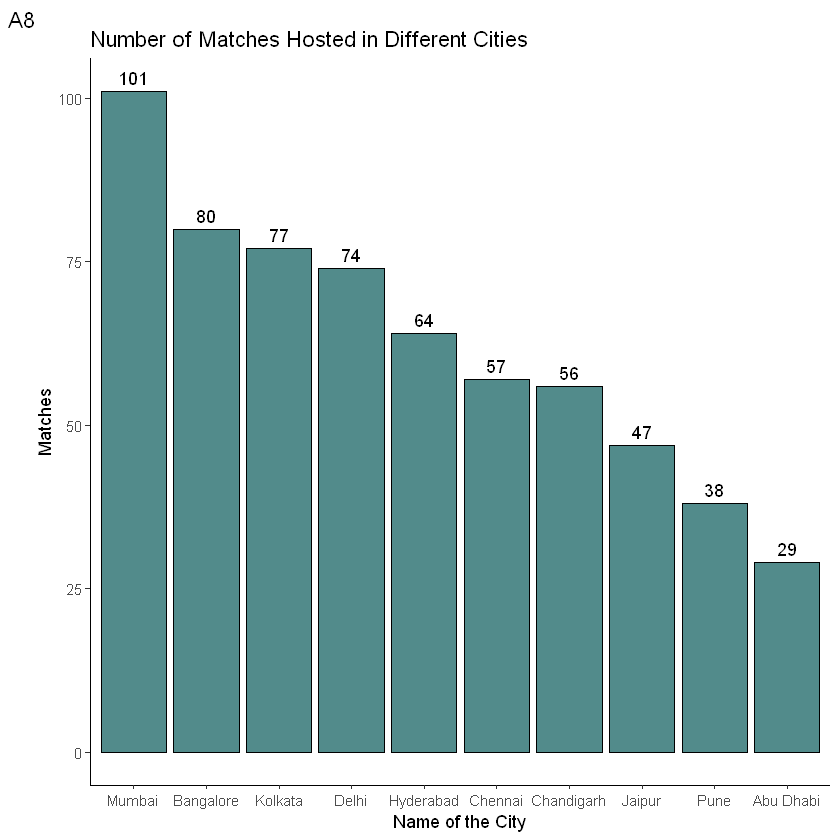

In [41]:
ggplot(top.city, aes(reorder(city, -Matches), Matches)) + theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  theme(legend.position = 'none') +
  geom_text(aes(label = Matches, vjust = -0.5))+
  labs(title = 'Number of Matches Hosted in Different Cities',
       x = 'Name of the City', tag = 'A8')

## Stadiums that hosted maximum matches

In [42]:
table(ipl$venue)


                                    Barabati Stadium 
                                                   7 
                                   Brabourne Stadium 
                                                  11 
                                        Buffalo Park 
                                                   3 
                               De Beers Diamond Oval 
                                                   3 
                          Dr DY Patil Sports Academy 
                                                  17 
 Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium 
                                                  13 
                 Dubai International Cricket Stadium 
                                                  33 
                                        Eden Gardens 
                                                  77 
                                    Feroz Shah Kotla 
                                                  74 
                           

### Few years ago PCA Stadium, Mohali was renamed to PCA IS Bindra Stadium, Mohali. So I have unified them as one.

In [43]:
ipl[ipl == 'Punjab Cricket Association IS Bindra Stadium, Mohali'] = 
  'Punjab Cricket Association Stadium, Mohali'

In [44]:
table(ipl$venue)


                                    Barabati Stadium 
                                                   7 
                                   Brabourne Stadium 
                                                  11 
                                        Buffalo Park 
                                                   3 
                               De Beers Diamond Oval 
                                                   3 
                          Dr DY Patil Sports Academy 
                                                  17 
 Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium 
                                                  13 
                 Dubai International Cricket Stadium 
                                                  33 
                                        Eden Gardens 
                                                  77 
                                    Feroz Shah Kotla 
                                                  74 
                           

In [45]:
top.stadiums = ipl %>% group_by(venue) %>% 
  summarise(Matches.played = n()) %>% arrange(desc(Matches.played))

top.stadiums = top.stadiums[1:10, ]

top.stadiums

venue,Matches.played
M Chinnaswamy Stadium,80
Eden Gardens,77
Feroz Shah Kotla,74
Wankhede Stadium,73
"Rajiv Gandhi International Stadium, Uppal",64
"MA Chidambaram Stadium, Chepauk",57
"Punjab Cricket Association Stadium, Mohali",56
Sawai Mansingh Stadium,47
Dubai International Cricket Stadium,33
Sheikh Zayed Stadium,29


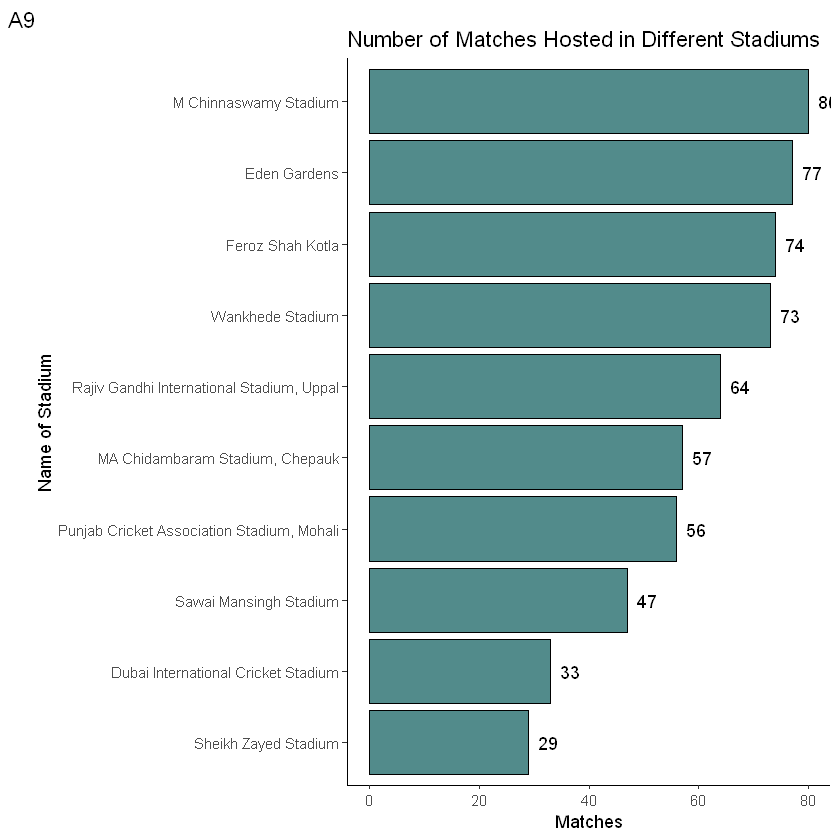

In [46]:
ggplot(top.stadiums, aes(reorder(venue, Matches.played),Matches.played)) + 
  theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  coord_flip() + theme(legend.position = 'none')+
  geom_text(aes(label = Matches.played, hjust = -0.5))+
  labs(title = 'Number of Matches Hosted in Different Stadiums', y = 'Matches',
       x = 'Name of Stadium',  tag = 'A9')


## Toss Ratio: 

In [47]:
toss.ratio = ipl %>% group_by(toss_decision) %>% 
  summarise(Ratio = n()) 

toss.ratio

toss_decision,Ratio
bat,320
field,496


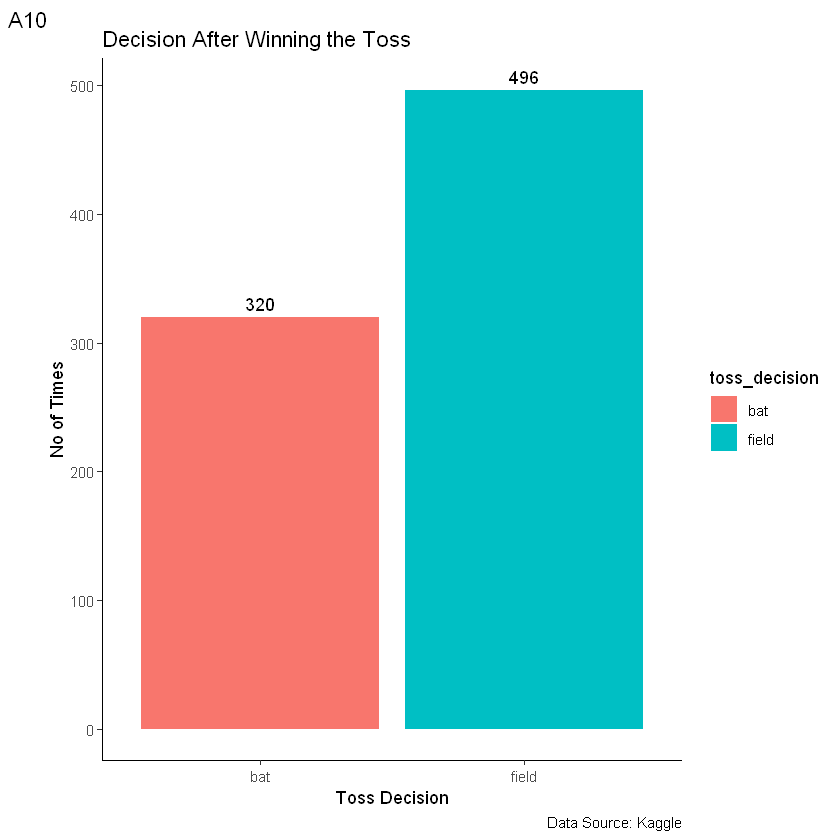

In [48]:
ggplot(toss.ratio, aes(toss_decision, Ratio, fill = toss_decision ))+ theme_classic()+
  geom_bar(stat = 'identity')+ geom_text(aes(label = Ratio, vjust = -0.5))+
  labs(title = 'Decision After Winning the Toss', tag = 'A10',
       x = 'Toss Decision', y = 'No of Times', caption = 'Data Source: Kaggle')


## Teams Batting First and Winning by More Than 100 Runs

In [49]:
runs.vic = ipl %>% group_by(winner) %>% 
  filter(result_margin >= 100) %>% arrange(desc(result_margin)) %>% 
  select(date, city, team1, team2, winner, result_margin)

runs.vic = as.data.frame(runs.vic)

runs.vic

date,city,team1,team2,winner,result_margin
06-05-2017,Delhi,Delhi Daredevils,Mumbai Indians,Mumbai Indians,146
14-05-2016,Bangalore,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144
18-04-2008,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,140
06-05-2015,Bangalore,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,138
23-04-2013,Bangalore,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,130
31-03-2019,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,118
17-05-2011,Dharamsala,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,111
30-05-2008,Mumbai,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,105
09-05-2018,Kolkata,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,102


## Teams Batting Second and Winning by 10 Wickets

In [51]:
win.by.10.wks = ipl %>% group_by(winner) %>% 
  filter(result == 'wickets') %>% filter(result_margin == 10) %>% 
  select(date, city, team1, team2, winner, result, result_margin)

win.by.10.wks = as.data.frame(win.by.10.wks)

win.by.10.wks


date,city,team1,team2,winner,result,result_margin
27-04-2008,Mumbai,Mumbai Indians,Deccan Chargers,Deccan Chargers,wickets,10
19-04-2009,Cape Town,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,wickets,10
18-03-2010,Bangalore,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,wickets,10
20-05-2011,Mumbai,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,wickets,10
20-05-2012,Jaipur,Rajasthan Royals,Mumbai Indians,Mumbai Indians,wickets,10
10-04-2013,Chandigarh,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,wickets,10
26-04-2015,Delhi,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,wickets,10
21-04-2016,Rajkot,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,wickets,10
07-04-2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,wickets,10
30-04-2017,Chandigarh,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,wickets,10
